In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas as pd
import os


In [4]:
file = "voter_summary2015.csv"
original_df = pd.read_csv(file)
original_df.head(300)

,REF_DATE,GEO,DGUID,Sex,Age group,Electoral participation in last federal election,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2014,Ontario,2016A000235,Both sexes,"Total, 25 years and over","Total, electoral participation",Number of persons,Persons,249,thousands,3,v98183323,7.1.1.1.1,9508.0,NaN,NaN,NaN,0
1,2014,Ontario,2016A000235,Both sexes,"Total, 25 years and over","Total, electoral participation","Low 95% confidence interval, number of persons",Low 95% confidence interval,206,thousands,3,v98183324,7.1.1.1.2,9503.0,NaN,NaN,NaN,0
2,2014,Ontario,2016A000235,Both sexes,"Total, 25 years and over","Total, electoral participation","High 95% confidence interval, number of persons",High 95% confidence interval,150,thousands,3,v98183325,7.1.1.1.3,9513.0,NaN,NaN,NaN,0
3,2014,Ontario,2016A000235,Both sexes,"Total, 25 years and over","Total, electoral participation",Percentage of persons,Percentage,242,units,0,v98183326,7.1.1.1.4,100.0,NaN,NaN,NaN,1
4,2014,Ontario,2016A000235,Both sexes,"Total, 25 years and over","Total, electoral participation","Low 95% confidence interval, percent",Low 95% confidence interval,206,units,0,v98183327,7.1.1.1.5,100.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2014,Ontario,2016A000235,Male,35 to 44 years,"Voted in last election, not stated","Low 95% confidence interval, number of persons",Low 95% confidence interval,206,thousands,3,v98183618,7.2.3.5.2,NaN,F,NaN,NaN,0
296,2014,Ontario,2016A000235,Male,35 to 44 years,"Voted in last election, not stated","High 95% confidence interval, number of persons",High 95% confidence interval,150,thousands,3,v98183619,7.2.3.5.3,NaN,F,NaN,NaN,0
297,2014,Ontario,2016A000235,Male,35 to 44 years,"Voted in last election, not stated",Percentage of persons,Percentage,242,units,0,v98183620,7.2.3.5.4,NaN,F,NaN,NaN,1
298,2014,Ontario,2016A000235,Male,35 to 44 years,"Voted in last election, not stated","Low 95% confidence interval, percent",Low 95% confidence interval,206,units,0,v98183621,7.2.3.5.5,NaN,F,NaN,NaN,1


In [5]:
count = original_df["Age group"].value_counts()
count.head()

Total, 25 years and over    90
75 years and over           90
55 to 64 years              90
35 to 44 years              90
25 to 34 years              90
Name: Age group, dtype: int64

In [6]:
cleaned_list = original_df.drop(columns=[ 'UOM','COORDINATE','SCALAR_ID','VECTOR','STATUS','SYMBOL','TERMINATED','SCALAR_FACTOR','Statistics','DECIMALS'])
cleaned_list.head()

,REF_DATE,GEO,DGUID,Sex,Age group,Electoral participation in last federal election,UOM_ID,VALUE
0,2014,Ontario,2016A000235,Both sexes,"Total, 25 years and over","Total, electoral participation",249,9508.0
1,2014,Ontario,2016A000235,Both sexes,"Total, 25 years and over","Total, electoral participation",206,9503.0
2,2014,Ontario,2016A000235,Both sexes,"Total, 25 years and over","Total, electoral participation",150,9513.0
3,2014,Ontario,2016A000235,Both sexes,"Total, 25 years and over","Total, electoral participation",242,100.0
4,2014,Ontario,2016A000235,Both sexes,"Total, 25 years and over","Total, electoral participation",206,100.0


In [7]:
grouped_voter_data = cleaned_list.groupby(['Sex', 'Age group'])
grouped_voter_data.head(400)

,REF_DATE,GEO,DGUID,Sex,Age group,Electoral participation in last federal election,UOM_ID,VALUE
0,2014,Ontario,2016A000235,Both sexes,"Total, 25 years and over","Total, electoral participation",249,9508.0
1,2014,Ontario,2016A000235,Both sexes,"Total, 25 years and over","Total, electoral participation",206,9503.0
2,2014,Ontario,2016A000235,Both sexes,"Total, 25 years and over","Total, electoral participation",150,9513.0
3,2014,Ontario,2016A000235,Both sexes,"Total, 25 years and over","Total, electoral participation",242,100.0
4,2014,Ontario,2016A000235,Both sexes,"Total, 25 years and over","Total, electoral participation",206,100.0
...,...,...,...,...,...,...,...,...
625,2014,Ontario,2016A000235,Female,75 years and over,"Voted in last election, not stated",206,NaN
626,2014,Ontario,2016A000235,Female,75 years and over,"Voted in last election, not stated",150,NaN
627,2014,Ontario,2016A000235,Female,75 years and over,"Voted in last election, not stated",242,NaN
628,2014,Ontario,2016A000235,Female,75 years and over,"Voted in last election, not stated",206,NaN


In [8]:
sex_summary=grouped_voter_data['VALUE'].sum().head(200)
sex_summary.head(200)

Sex         Age group               
Both sexes  25 to 34 years              11900.3
            35 to 44 years              11592.0
            45 to 54 years              13176.9
            55 to 64 years              10915.9
            65 to 74 years               7341.8
            75 years and over            5668.1
            Total, 25 years and over    57649.2
Female      25 to 34 years               6260.0
            35 to 44 years               6150.3
            45 to 54 years               6872.2
            55 to 64 years               5847.8
            65 to 74 years               4099.0
            75 years and over            3536.2
            Total, 25 years and over    29958.5
Male        25 to 34 years               6153.2
            35 to 44 years               5934.8
            45 to 54 years               6856.1
            55 to 64 years               5604.8
            65 to 74 years               3812.8
            75 years and over            2649.6
   

In [9]:
#pie chart of the portions of the age in the female and male voters
#Female pie chart voters
labels = ["25 to 34 years"," 35 to 44 years ","45 to 54 years "," 55 to 64 years","65 to 74 years","75 years and over"]

# The values of each section of the pie chart
sizes = [6260,6150.3,6872.2,5847.8,4099,3536.2]

# The colors of each section of the pie chart
colors = ["lightblue","purple","pink","yellowgreen","lightskyblue","lightcoral"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0, 0, 0,0,0)

<IPython.core.display.Javascript object>


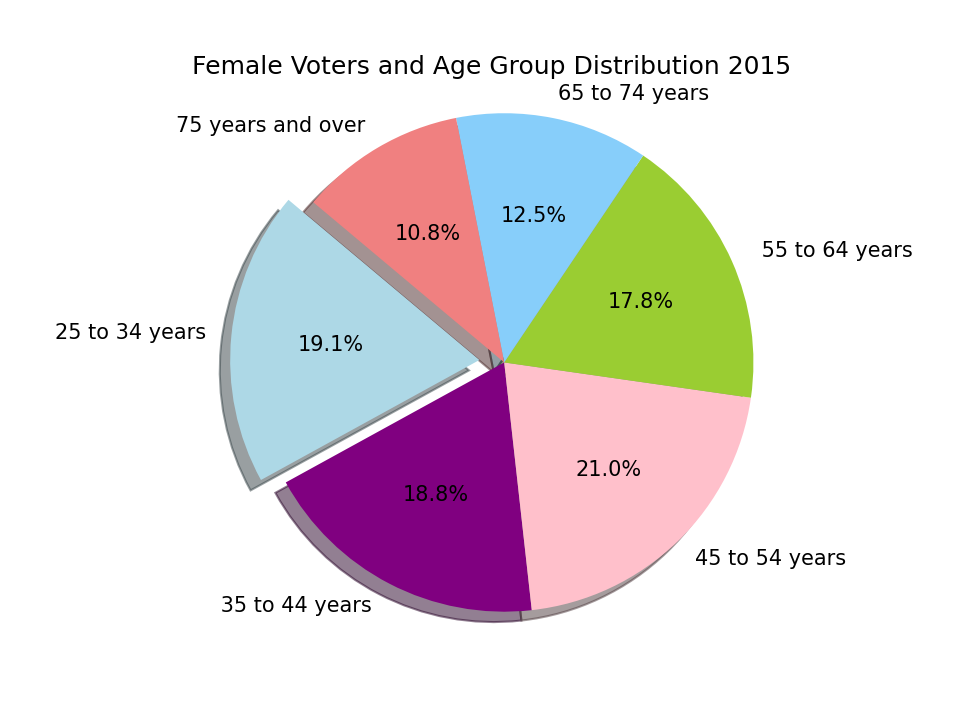

In [10]:
plt.pie(sizes,explode=explode,labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

In [12]:
plt.title("Female Voters and Age Group Distribution 2015")


Text(0.5, 1.0, 'Female Voters and Age Group Distribution 2015')